In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [285]:
df = pd.read_csv("/home/ayush/Downloads/car_price.csv")

In [286]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [287]:
for col in df.columns:
    if(col not in ['name', 'year', 'selling_price','km_driven','mileage','engine','max_power', 'torque']):
        print(col,"---->",df[col].unique())

fuel ----> ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type ----> ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ----> ['Manual' 'Automatic']
owner ----> ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
seats ----> [ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


In [288]:
for col in df.columns:
    print(col,"-->",df[col].isnull().sum())

name --> 0
year --> 0
selling_price --> 0
km_driven --> 0
fuel --> 0
seller_type --> 0
transmission --> 0
owner --> 0
mileage --> 221
engine --> 221
max_power --> 216
torque --> 222
seats --> 221


In [289]:
df. dropna(subset = ["torque"], inplace=True) 

In [290]:
for col in df.columns:
    print(col,"-->",df[col].nunique())

name --> 1982
year --> 27
selling_price --> 670
km_driven --> 898
fuel --> 4
seller_type --> 3
transmission --> 2
owner --> 5
mileage --> 381
engine --> 121
max_power --> 318
torque --> 440
seats --> 9


In [291]:
for col in df.columns:
    print(col,"-->",df[col].isnull().sum())

name --> 0
year --> 0
selling_price --> 0
km_driven --> 0
fuel --> 0
seller_type --> 0
transmission --> 0
owner --> 0
mileage --> 0
engine --> 0
max_power --> 0
torque --> 0
seats --> 0


In [292]:
scale_mapper = {"Diesel":1, "Petrol":2, "LPG":3,"CNG":4}
df["fuel"] = df["fuel"].replace(scale_mapper)
scale_mapper = {'Individual':1, 'Dealer':2, 'Trustmark Dealer':3}
df["seller_type"] = df["seller_type"].replace(scale_mapper)
scale_mapper = {'Manual':1, 'Automatic':2}
df["transmission"] = df["transmission"].replace(scale_mapper)
scale_mapper = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
 'Test Drive Car':5}
df["owner"] = df["owner"].replace(scale_mapper)
for col in df.columns:
    if(col not in ['name', 'year', 'selling_price','km_driven','mileage','engine','max_power', 'torque']):
        print(col,"---->",df[col].unique())

fuel ----> [1 2 3 4]
seller_type ----> [1 2 3]
transmission ----> [1 2]
owner ----> [1 2 3 4 5]
seats ----> [ 5.  4.  7.  8.  6.  9. 10. 14.  2.]


In [293]:
df = df.drop(columns=['torque'],axis=1)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


In [294]:
#figure(figsize=(30,50), dpi=80)
#sns.boxplot(y = "selling_price",x = "year", data = df)

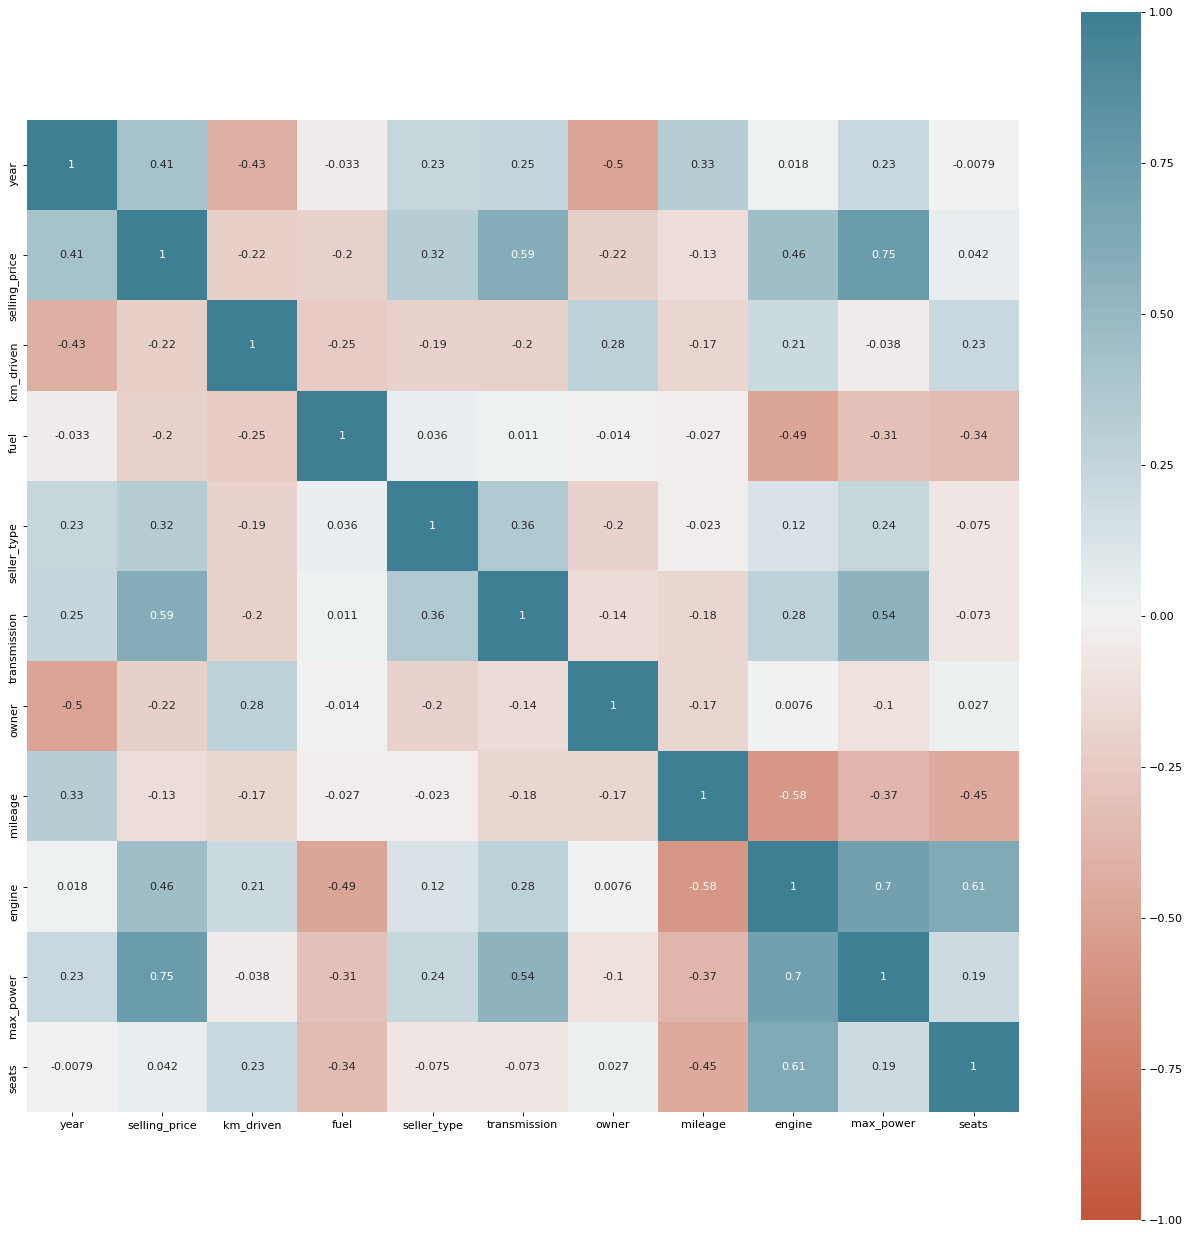

In [295]:
figure(figsize=(20,20), dpi=80)

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

In [296]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


/home/ayush/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

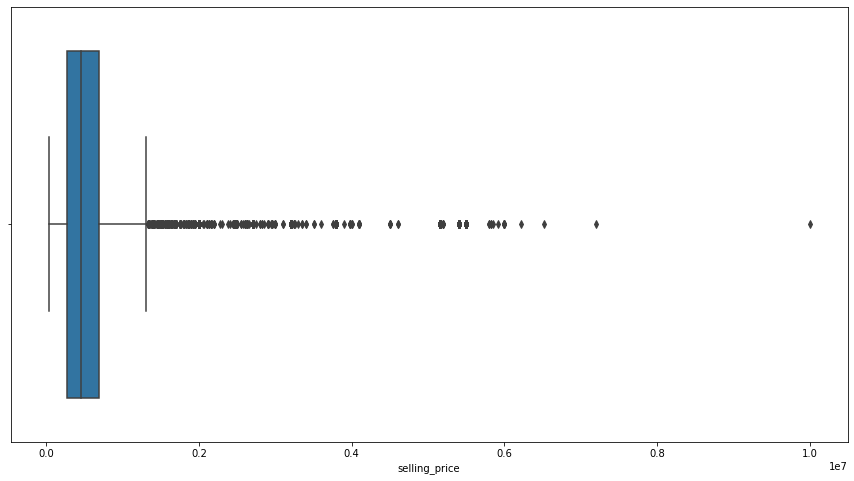

In [297]:
figure(figsize=[15,8])
sns.boxplot(df['selling_price'])



In [298]:
#df = df.drop_duplicates()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


In [299]:
df = df[~(df.selling_price > 5000000)]
df



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


/home/ayush/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

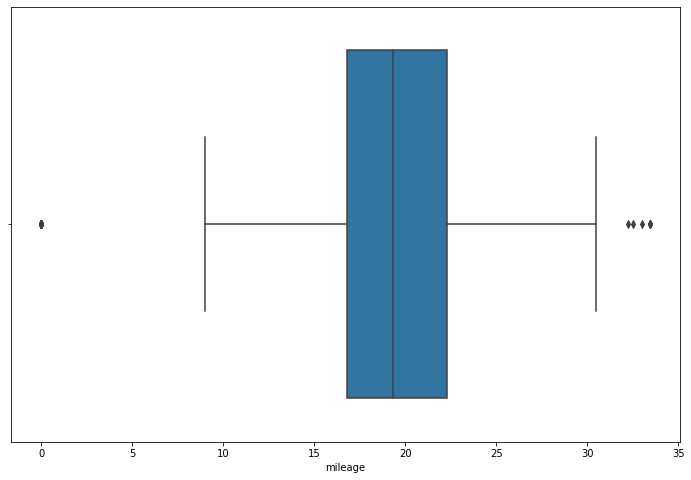

In [300]:
figure(figsize=[12,8])
sns.boxplot(df.mileage)

In [301]:
df = df[~((df.mileage > 32.5) | (df.mileage <5))]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


/home/ayush/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine'>

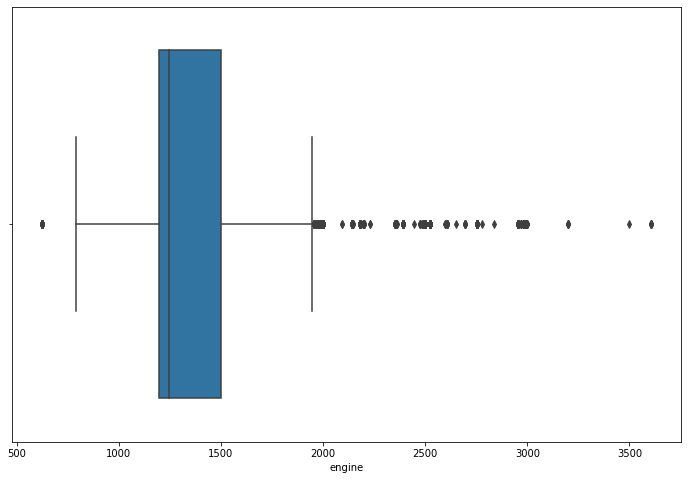

In [302]:
figure(figsize=[12,8])
sns.boxplot(df.engine)

In [303]:
df = df[~((df.engine > 2500) | (df.engine < 650))]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


/home/ayush/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_power'>

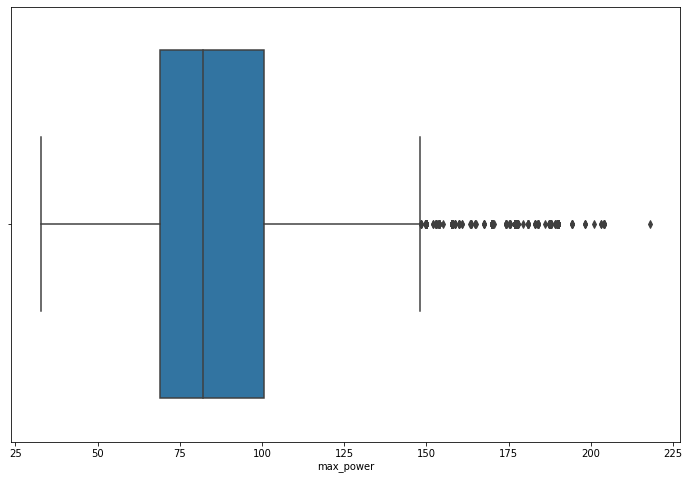

In [304]:
figure(figsize=[12,8])
sns.boxplot(df.max_power)


In [305]:
df = df[~(df.max_power > 175)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0


In [306]:
df['current_year']=2021
df['years_old'] = df['current_year'] - df['year']
df = df.drop(columns=['current_year','year'],axis =1)
df

<ipython-input-306-b4fe89e0d0e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_year']=2021
<ipython-input-306-b4fe89e0d0e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_old'] = df['current_year'] - df['year']


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,years_old
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,8
8124,Hyundai Verna CRDi SX,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,14
8125,Maruti Swift Dzire ZDi,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0,12
8126,Tata Indigo CR4,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0,8


In [307]:
df.drop_duplicates()
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,years_old
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,8
8124,Hyundai Verna CRDi SX,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,14
8125,Maruti Swift Dzire ZDi,382000,120000,1,1,1,1,19.30,1248.0,73.90,5.0,12
8126,Tata Indigo CR4,290000,25000,1,1,1,1,23.57,1396.0,70.00,5.0,8


In [308]:
y = df['selling_price']
x = df.drop(columns=['selling_price','name'],axis=1)

In [309]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =42)

In [310]:
reg = LinearRegression().fit(x_train, y_train)

In [311]:
pred =reg.predict(x_test)

In [312]:
r2score = r2_score(y_test, pred)
r2score

0.6721371829959544

In [313]:
#scale = MinMaxScaler()
#for col in ['km_driven','mileage','engine','max_power']:
 #   df[col] = scale.fit_transform(df[[col]])
#df

In [314]:
#reg2 = LinearRegression().fit(x_train, y_train)
#pred2 =reg.predict(x_test)
#r2score = r2_score(y_test, pred2)
#r2score

In [317]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [318]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
#Haximum number of Levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)] 
#max_depth.append(None) #Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each teaf node
min_samples_leaf = [1, 2, 5, 10]

In [319]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

print (random_grid)



{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [320]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [321]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [322]:
y_pred=rf_random.predict(x_test)
y_pred

array([603022.10606825, 600378.57792352, 611160.59358723, ...,
       795813.24821286, 473854.89626076, 330187.21885513])

In [324]:
r2score = r2_score(y_test, y_pred)
r2score

0.9209246457902139